# Customer Analytics (Part 1) - Segmentation

#### Importing libraries and data

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import scipy
sns.set()

In [2]:
df = pd.read_csv('/Users/mhlaghari/Downloads/segmentation data.csv', index_col=0)

In [3]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [4]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


#### Creating a heatmap to see correlations

Text(0.5, 1.0, 'Correlation Heatmap')

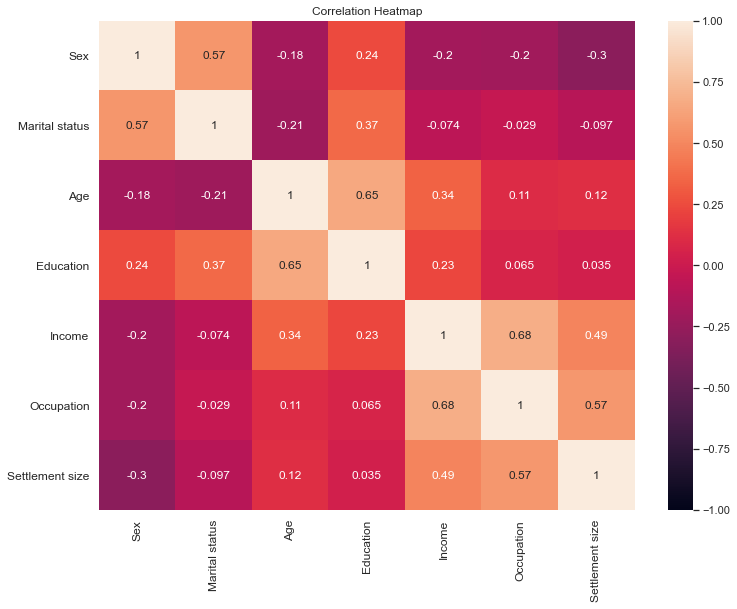

In [5]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1)
s.set_yticklabels(s.get_yticklabels(),rotation=0, fontsize =12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title ('Correlation Heatmap')


Text(0.5, 1.0, 'Scatter plot of Age v Income')

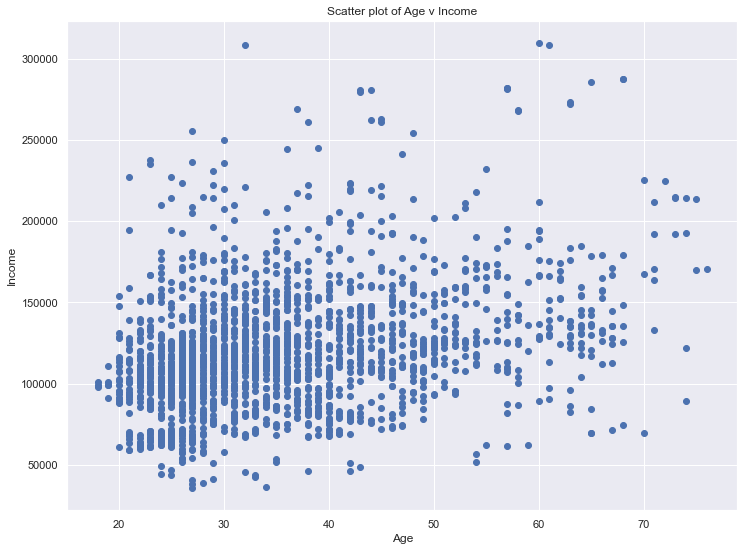

In [6]:
plt.figure(figsize=(12,9))
plt.scatter(df.iloc[:,2],df.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter plot of Age v Income')

#### Performing Clustering techniques

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [10]:
hier_clust = linkage(segmentation_std, method='ward')

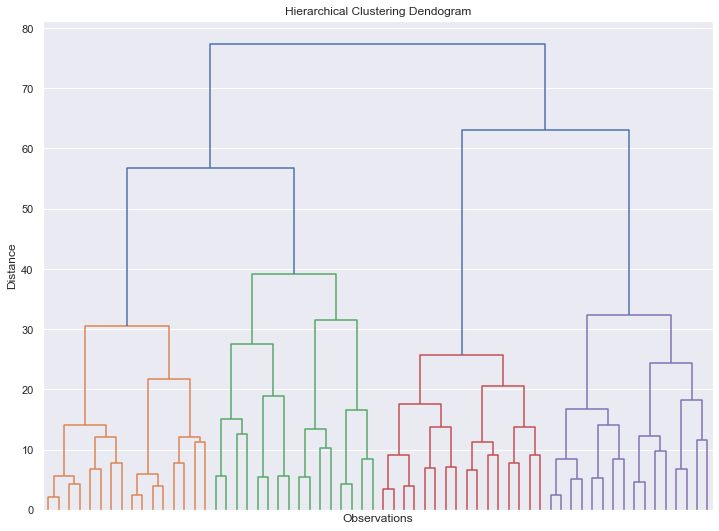

In [11]:
plt.figure(figsize=(12,9))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,truncate_mode='level', p=5, show_leaf_counts= False, 
           no_labels= True
        )
plt.show()

#  KMeans Cluster

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

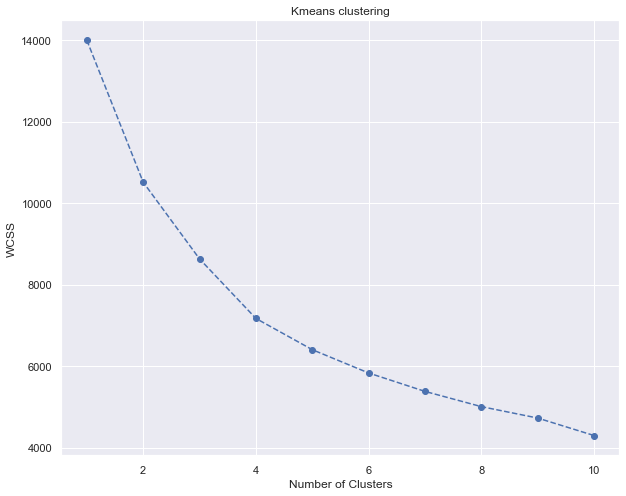

In [14]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker ='o', linestyle = '--')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.title('Kmeans clustering')
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=42)

In [16]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [17]:
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [18]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-Means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [19]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-Means','Sex']].groupby(['Segment K-Means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()

In [20]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-Means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [21]:
  df_segm_analysis.rename({0: 'well-off',
                          1: 'fewer-opportunities',
                          2: 'standard',
                          3: 'career-focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-Means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career-focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [22]:
df_segm_kmeans['labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'well-off',
                          1: 'fewer-opportunities',
                          2: 'standard',
                          3: 'career-focused'})

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


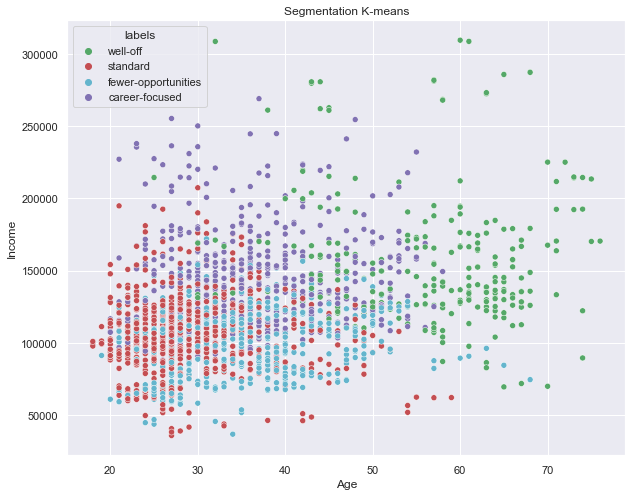

In [23]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_kmeans['labels'], palette=['g','r','c','m']
        )
plt.title('Segmentation K-means')
plt.show()

#  KMeans Clutering with PCA

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA()

In [26]:
pca.fit(segmentation_std)

PCA()

In [27]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Variance')

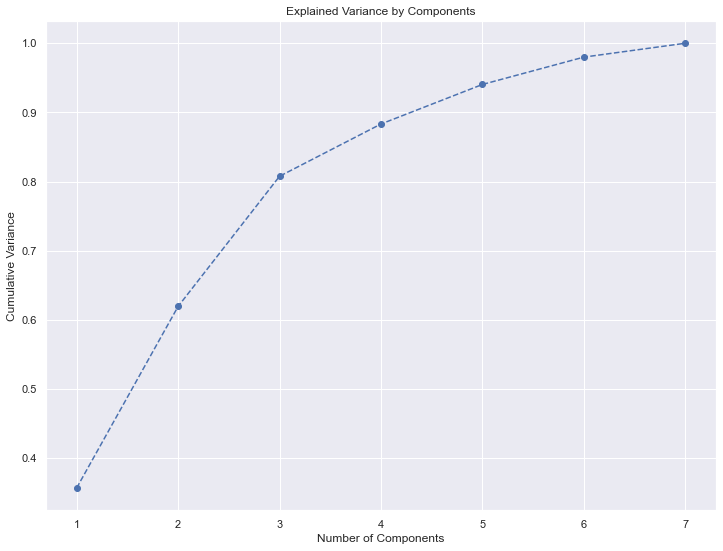

In [28]:
plt.figure(figsize= (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [29]:
pca = PCA(n_components= 3)

In [30]:
pca.fit(segmentation_std)

PCA(n_components=3)

In [31]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [32]:
df_pca_comp = pd.DataFrame(data = pca.components_, columns= df.columns.values,
                          index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


<AxesSubplot:>

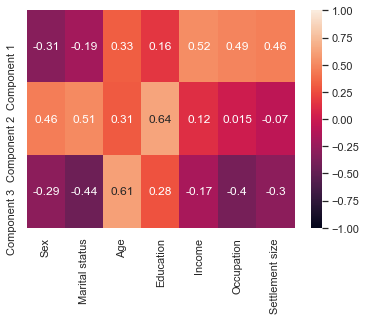

In [33]:
sns.heatmap(df_pca_comp, vmin=-1, vmax=1, annot=True)

In [34]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [35]:
scores_pca = pca.transform(segmentation_std)

In [36]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 42)
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)


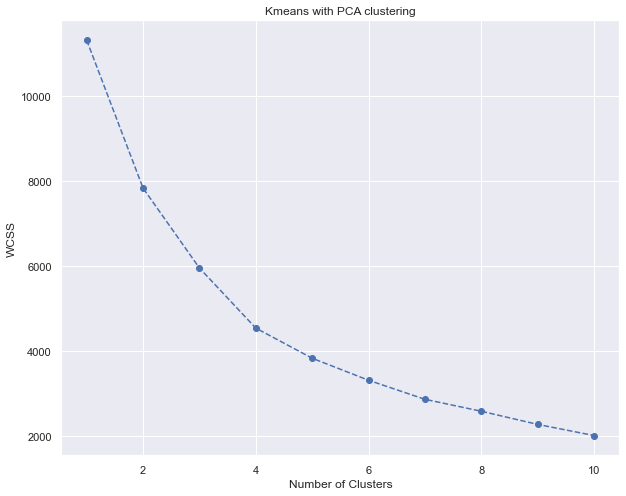

In [37]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker ='o', linestyle = '--')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.title('Kmeans with PCA clustering')
plt.show()

In [38]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state= 42)

In [39]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

# Kmeans PCA Results

In [40]:
df_segm_kmeans_pca = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_kmeans_pca.columns.values[-3:] = ['Component 1','Component 2','Component 3']
df_segm_kmeans_pca['Segment K-Means PCA'] = kmeans_pca.labels_

In [41]:
df_segm_kmeans_pca_frequency = df_segm_kmeans_pca.groupby(['Segment K-Means PCA']).mean()
df_segm_kmeans_pca_frequency

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-Means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [42]:
df_segm_kmeans_pca_frequency['N Obs'] = df_segm_kmeans_pca[['Segment K-Means PCA','Sex']].groupby(['Segment K-Means PCA']).count()
df_segm_kmeans_pca_frequency['Prop Obs'] = df_segm_kmeans_pca_frequency['N Obs']/df_segm_kmeans_pca_frequency['N Obs'].sum()
df_segm_kmeans_pca_frequency = df_segm_kmeans_pca_frequency.rename({0: 'standard',
                          1: 'career-focused',
                          2: 'fewer opportunities',
                          3: 'well-off'})
df_segm_kmeans_pca_frequency


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-Means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career-focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [43]:
df_segm_kmeans_pca['labels'] = df_segm_kmeans_pca['Segment K-Means PCA'].map({0: 'standard',
                          1: 'career-focused',
                          2: 'fewer opportunities',
                          3: 'well-off'})

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


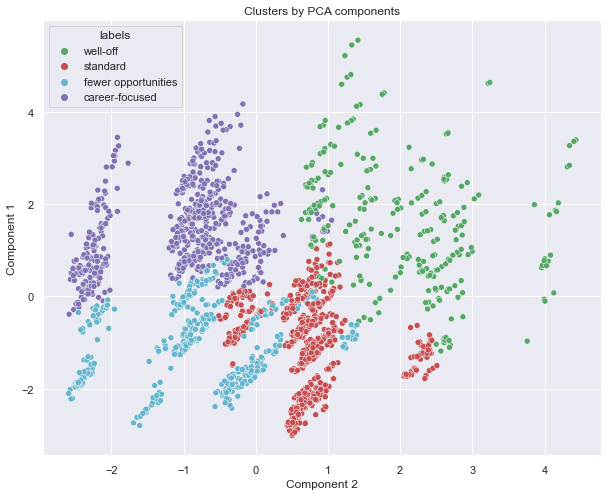

In [44]:
x_axis = df_segm_kmeans_pca['Component 2']
y_axis = df_segm_kmeans_pca['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_kmeans_pca['labels'], palette= ['g','r','c','m'])
plt.title('Clusters by PCA components')
plt.show()

#  Export

In [45]:
import pickle

In [46]:
pickle.dump(scaler, open('scaler.pickle','wb'))
pickle.dump(pca, open('pca.pickle','wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle','wb'))